In [1]:
!pip install -q -r requirements.txt

In [2]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
data=pd.read_csv('input/data.csv', index_col=0, parse_dates=[0])
print(data.shape)
data.head()

(427, 12)


,total_purchase_amt,total_redeem_amt,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
date,,,,,,,,,,,,
2013-07-01,0.165344,0.036072,4.456,5.423,6.040,6.8800,5.295,4.2390,4.2820,4.4125,1.5787,6.307
2013-07-02,0.147781,0.016678,3.786,4.750,5.074,5.8000,5.211,4.2344,4.2808,4.4070,1.5461,6.174
2013-07-03,0.138790,0.038872,3.400,4.242,4.658,5.2000,5.148,4.2300,4.2796,4.4022,1.4670,6.034
2013-07-04,0.093242,0.041854,3.348,3.938,4.464,5.1020,5.029,4.2287,4.2776,4.4000,1.4223,5.903
2013-07-05,0.059284,0.018043,3.380,3.816,4.295,4.7885,4.939,4.2273,4.2749,4.4000,1.3845,5.739


In [4]:
train=data.iloc[:-30 ]['total_purchase_amt']
test=data.iloc[-30: ]['total_purchase_amt']
print(train.shape, test.shape)


(397,) (30,)


### train

In [5]:
model = prophet.Prophet().fit(train.reset_index().rename(columns={'date':'ds', 'total_purchase_amt':'y'}))

14:16:03 - cmdstanpy - INFO - Chain [1] start processing


14:16:03 - cmdstanpy - INFO - Chain [1] done processing


### results

Prophet excels at capturing both trends and seasonality in data. The accuracy of its predictions on test data underscores its practical utility for real-world applications.

In [6]:
train_pred=model.predict(train.reset_index().rename(columns={'date':'ds', 'total_purchase_amt':'y'})).set_index('ds')
train_pred.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2013-07-01,-0.080278,-0.464606,0.801439,-0.080278,-0.080278,0.224830,0.224830,0.224830,0.224830,0.224830,0.224830,0.0,0.0,0.0,0.144553
2013-07-02,-0.074258,-0.390944,0.811424,-0.074258,-0.074258,0.243481,0.243481,0.243481,0.243481,0.243481,0.243481,0.0,0.0,0.0,0.169223
2013-07-03,-0.068238,-0.455197,0.743526,-0.068238,-0.068238,0.194949,0.194949,0.194949,0.194949,0.194949,0.194949,0.0,0.0,0.0,0.126711
2013-07-04,-0.062218,-0.629852,0.627237,-0.062218,-0.062218,0.109443,0.109443,0.109443,0.109443,0.109443,0.109443,0.0,0.0,0.0,0.047224
2013-07-05,-0.056199,-0.764553,0.445610,-0.056199,-0.056199,-0.094449,-0.094449,-0.094449,-0.094449,-0.094449,-0.094449,0.0,0.0,0.0,-0.150648


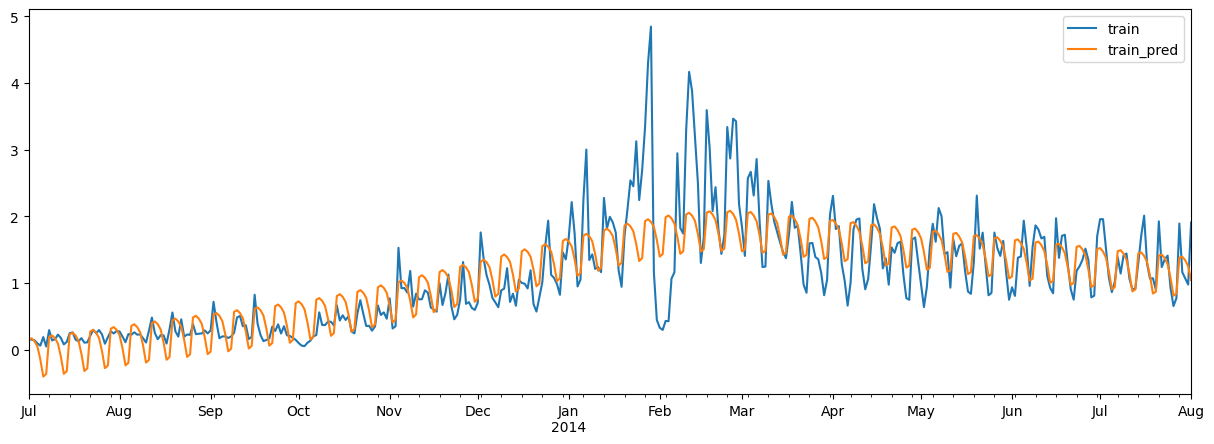

In [7]:
pd.concat([train,train_pred['yhat']], axis=1).plot(figsize=(15,5)) 
plt.legend(['train', 'train_pred'])

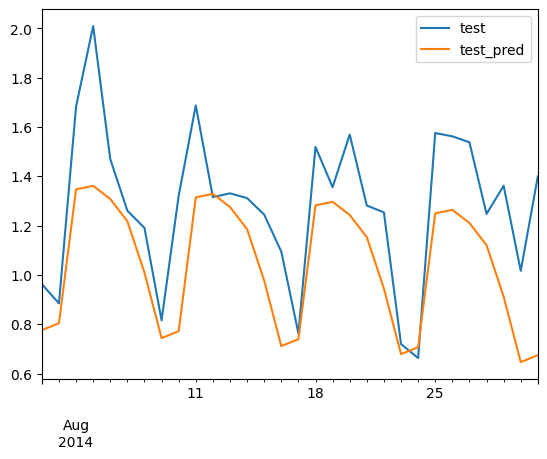

In [8]:
test_pred=model.predict(test.reset_index().rename(columns={'date':'ds', 'total_purchase_amt':'y'})).set_index('ds')
pd.concat([test,test_pred['yhat']], axis=1).plot( )
plt.legend(['test', 'test_pred'])